In [1]:
!pip install tensorflow

In [2]:
import pandas as pd

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
from tensorflow.keras.datasets import cifar10

In [7]:
import matplotlib.pyplot as plt

In [8]:
import tensorflow as tf

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 64s 0us/step


In [14]:
mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

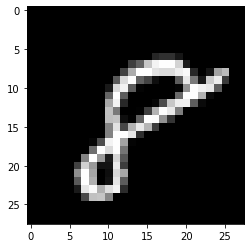

In [17]:
plt.imshow(train_images[59999],cmap='gray')

In [20]:
train_images=train_images/255.0
test_images=test_images/255.0

In [21]:
#resimleri okuyup anlayabiliyor
#cep telefonuna app olarak koyunca kağıda yazılan yazıyı telefonda normal yazıya çevirebiliyor.
model=Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(28,28)))
model.add(tf.keras.layers.Reshape(target_shape=(28,28,1)))
#kaç nöron olması gerektiğini yazıyoruz o sayıların yerine
model.add(tf.keras.layers.Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20))

In [22]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [23]:
model.fit(train_images,train_labels,validation_split=0.10,epochs=20,verbose=1)

Epoch 1/20
1688/1688 [==============================] - 26s 14ms/step - loss: 0.3053 - accuracy: 0.9151 - val_loss: 0.1193 - val_accuracy: 0.9685
Epoch 2/20
1688/1688 [==============================] - 22s 13ms/step - loss: 0.1155 - accuracy: 0.9665 - val_loss: 0.0834 - val_accuracy: 0.9788
Epoch 3/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0820 - accuracy: 0.9760 - val_loss: 0.0700 - val_accuracy: 0.9820
Epoch 4/20
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0669 - accuracy: 0.9800 - val_loss: 0.0695 - val_accuracy: 0.9825
Epoch 5/20
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0584 - accuracy: 0.9824 - val_loss: 0.0648 - val_accuracy: 0.9828
Epoch 6/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0516 - accuracy: 0.9842 - val_loss: 0.0613 - val_accuracy: 0.9837
Epoch 7/20
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0585 - v

In [24]:
scores=model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0749 - accuracy: 0.9810
